In [11]:
from Bio import Phylo

tree = Phylo.read('tree.nwk', 'newick')

#print(tree)

#Phylo.draw_ascii(tree)

#tree.ladderize()
#Phylo.draw(tree)

Phylo.draw_ascii(tree)

 , rh.61
 |
 |_ rh.58
 |
 |                               , pi.2
 |           ____________________|
 |          |                    , pi.3
 |          |                    |
 |          |                    | pi.1
 |          |
 |          |           , rh.10
 |        __|          _|
 |       |  |         | , bb.1
 |       |  |         | |
 |       |  |  _______| | bb.2
 |       |  | |       |
 |       |  | |       | _ hu.17
 |       |  | |       ||
 |       |  |_|        | hu.6
 |       |    |
 |       |    |    _______ rh.2
 |       |    |   |
 |       |    |___|          __ rh.40
 |       |        |         |
 |       |        |_________|, hu.67
 |       |                  ||
 |       |                  |, hu.37
 |       |                   |
 |       |                   , hu.40
 |       |                   |
 |       |                   | hu.66
 |       |                   |
 |       |                   , hu.41
 |       |                   |
 |       |                   | rh.38
 

Cluster Grouping

#1
'rh.61', 'rh.58'

#2
'pi.2', 'pi.3', 'pi.1'

#3
'rh.10', 'bb.1', 'bb.2', 'hu.17', 'hu.6'

#4
'rh.2', 'rh.40', 'hu.67', 'hu.37', 'hu.40', 'hu.66', 'hu.41', 'rh.38', 'hu.42'

#5
'cy.3', 'cy.6', 'cy.4', 'cy.5', 'rh.13'

#6
'rh.35', 'rh.36', 'rh.37'

#7
'cy.2', 'rh.54', 'rh.55', 'rh.48', 'rh.62'

#8
'hu.43', 'hu.48', 'hu.44', 'hu.46'

#9
'hu.14', 'hu.31', 'hu.32', 'rh.43'

#10
'rh.64', 'rh.57', 'rh.51', 'rh.49', 'rh.53', 'rh.50', 'rh.52', 'hu.39'

   A/T    G/C  blnk  AT.ro  GC.ro
  1924   2510    42  0.434  0.566


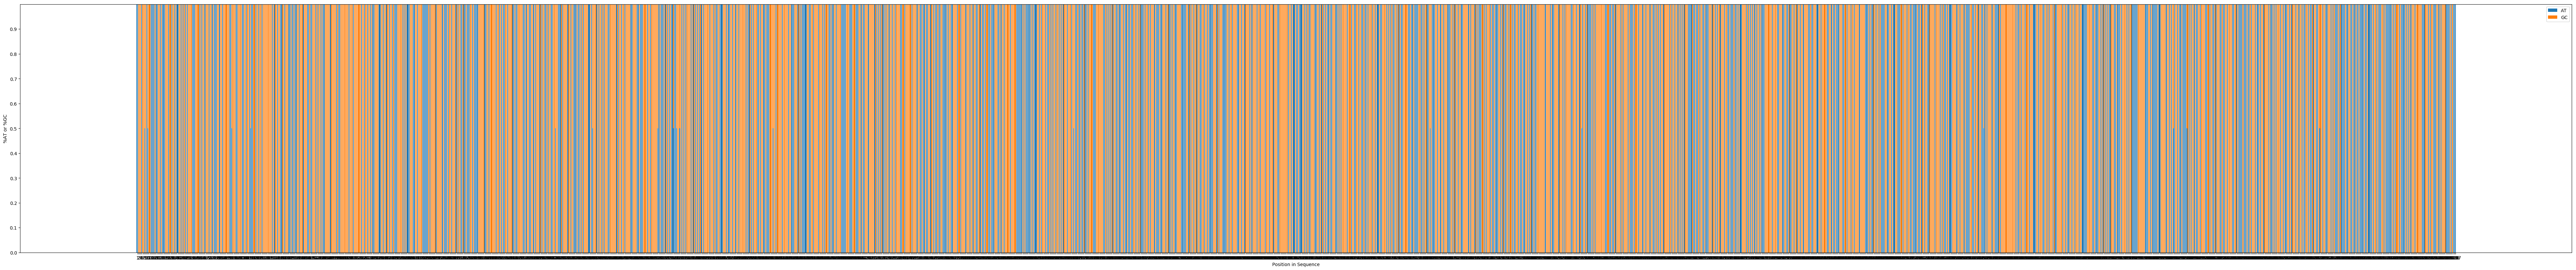

  2731   3857   126  0.415  0.585


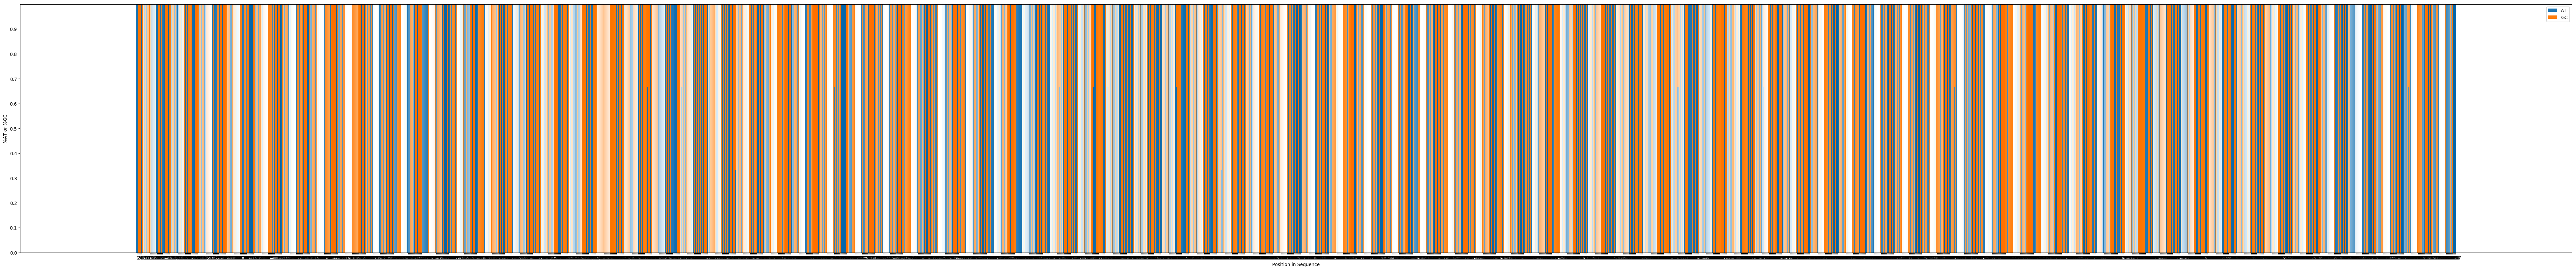

  4873   6212   105   0.44   0.56


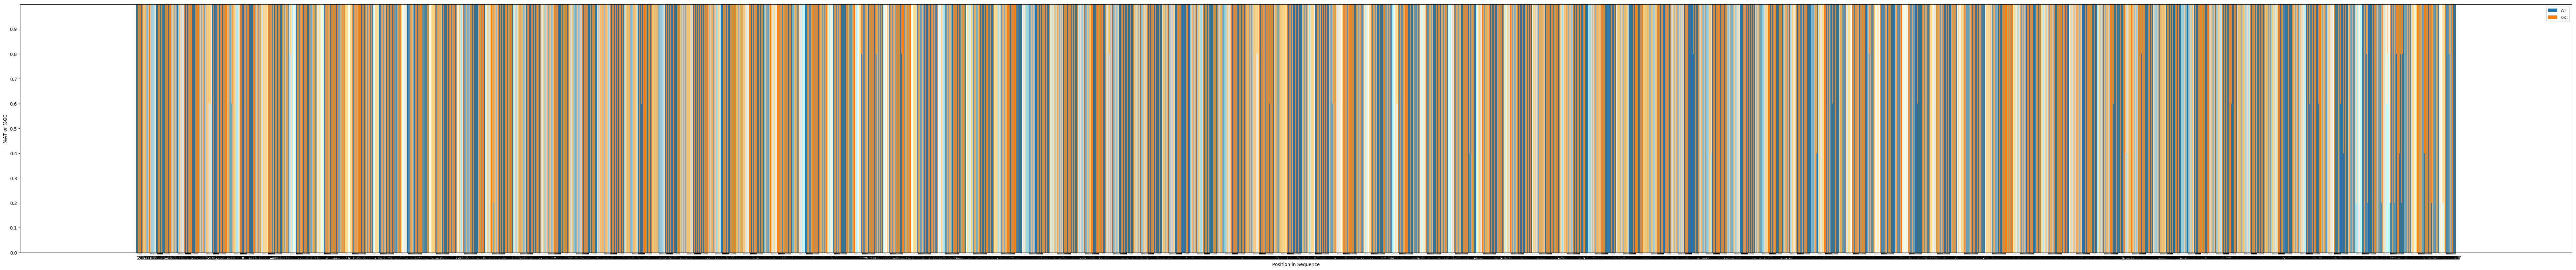

  8999  10954   189  0.451  0.549


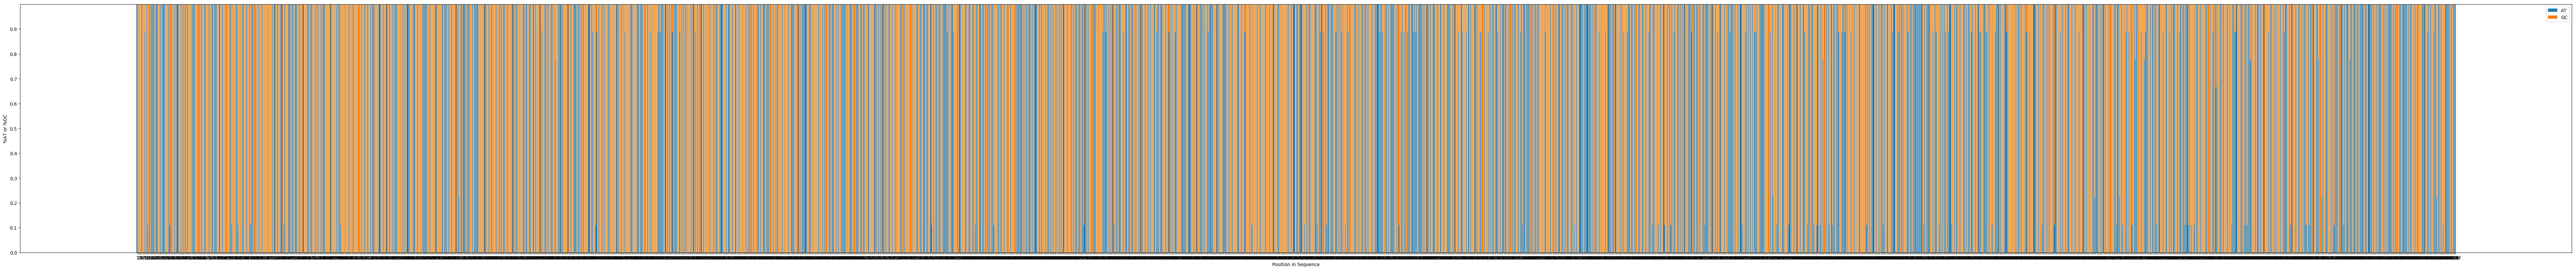

  4798   6137   255  0.439  0.561


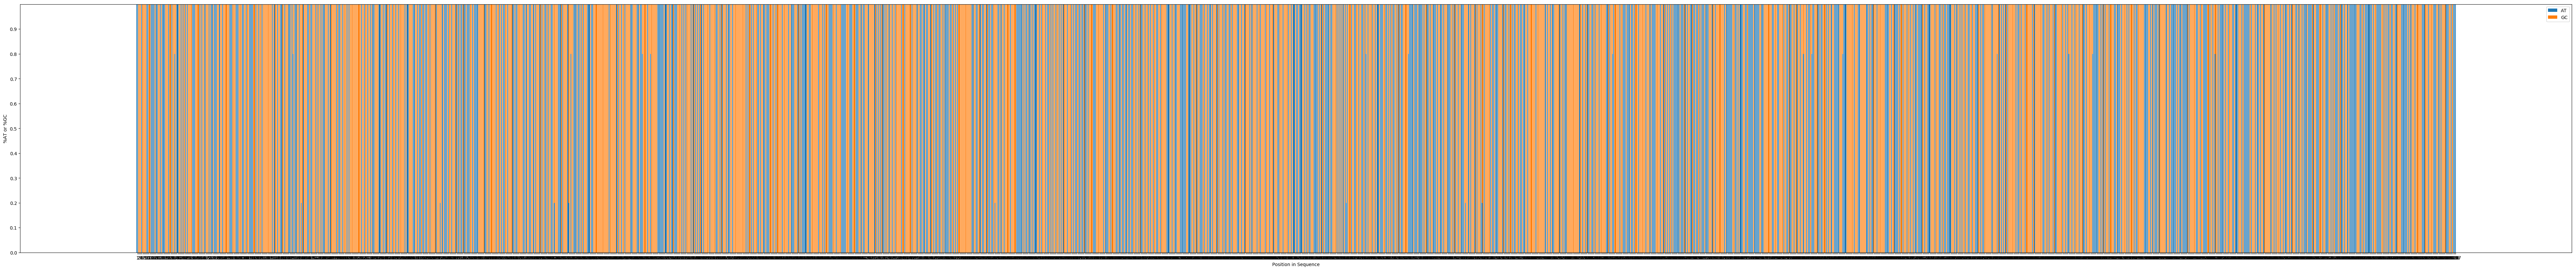

  2949   3621   144  0.449  0.551


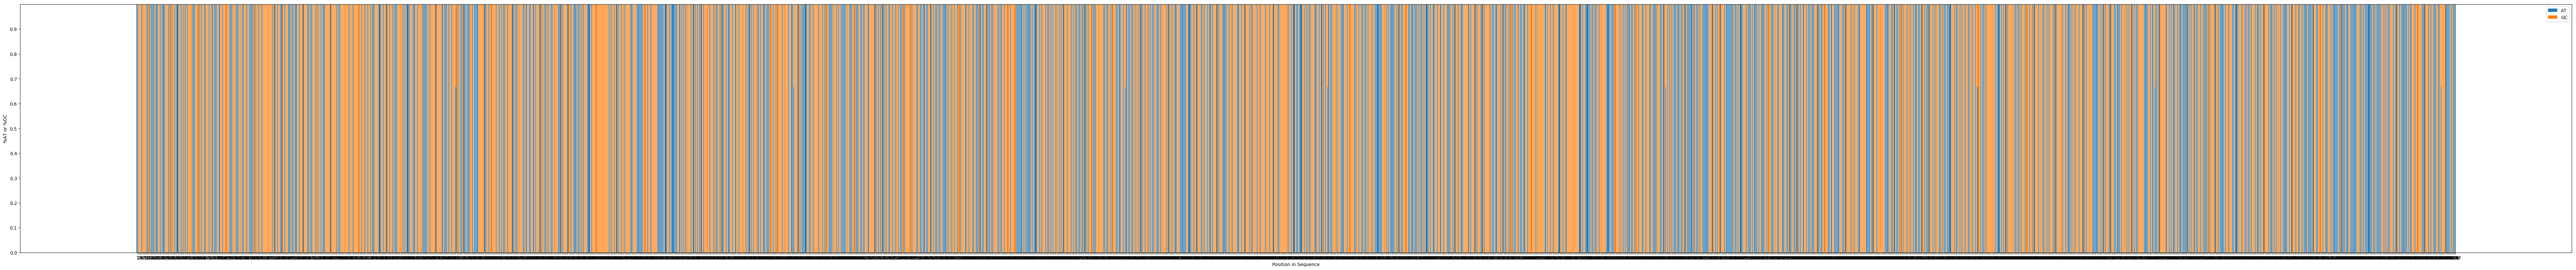

  4913   6157   120  0.444  0.556


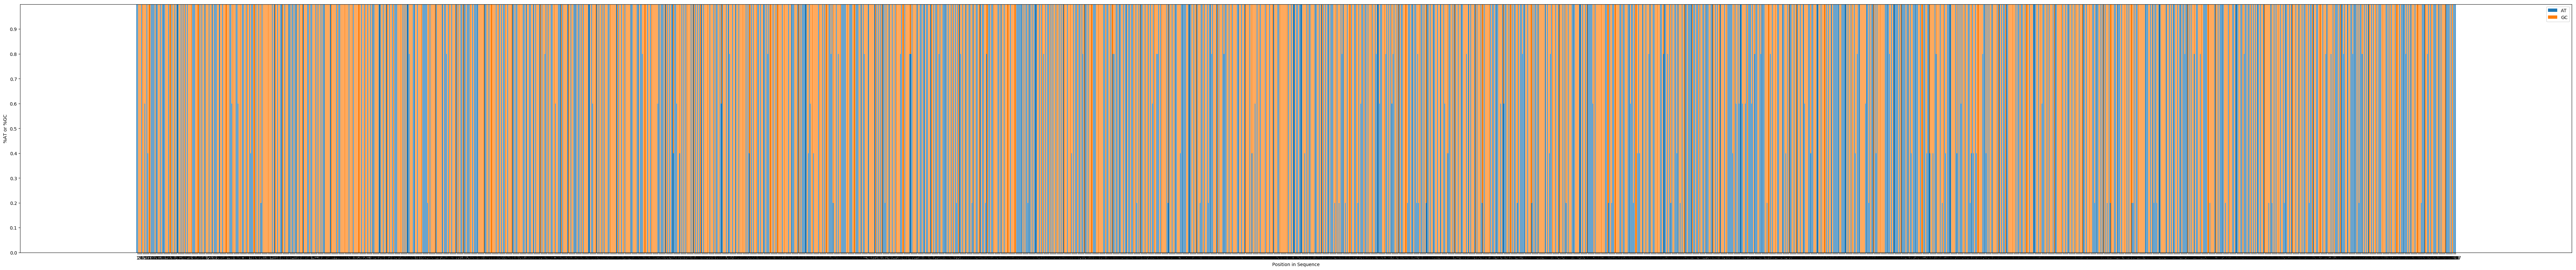

  4069   4778   105   0.46   0.54


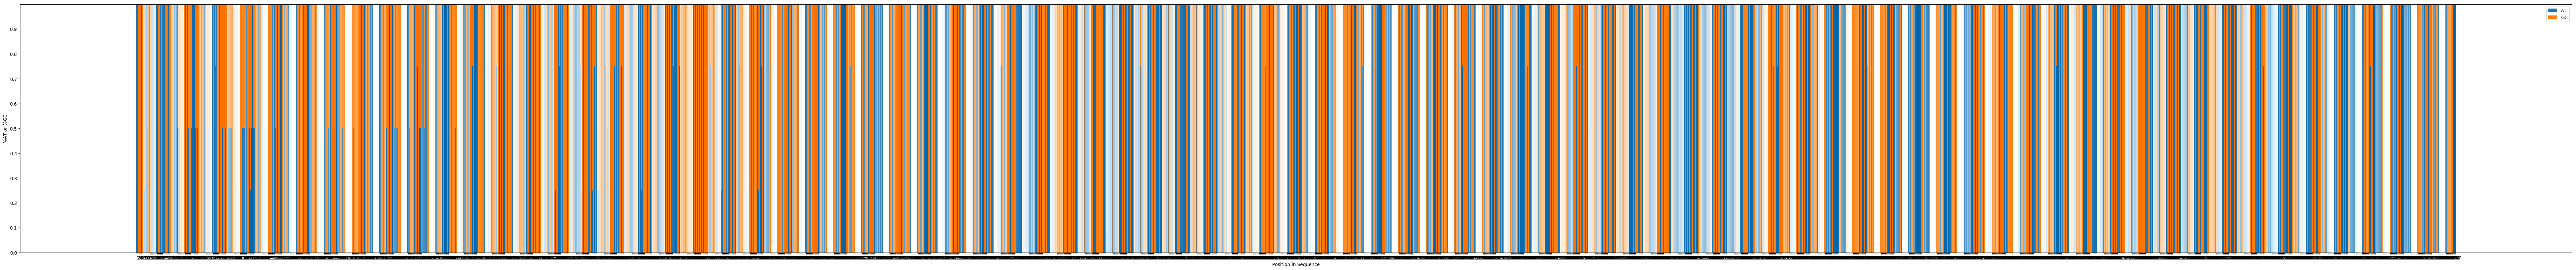

  4131   4713   108  0.467  0.533


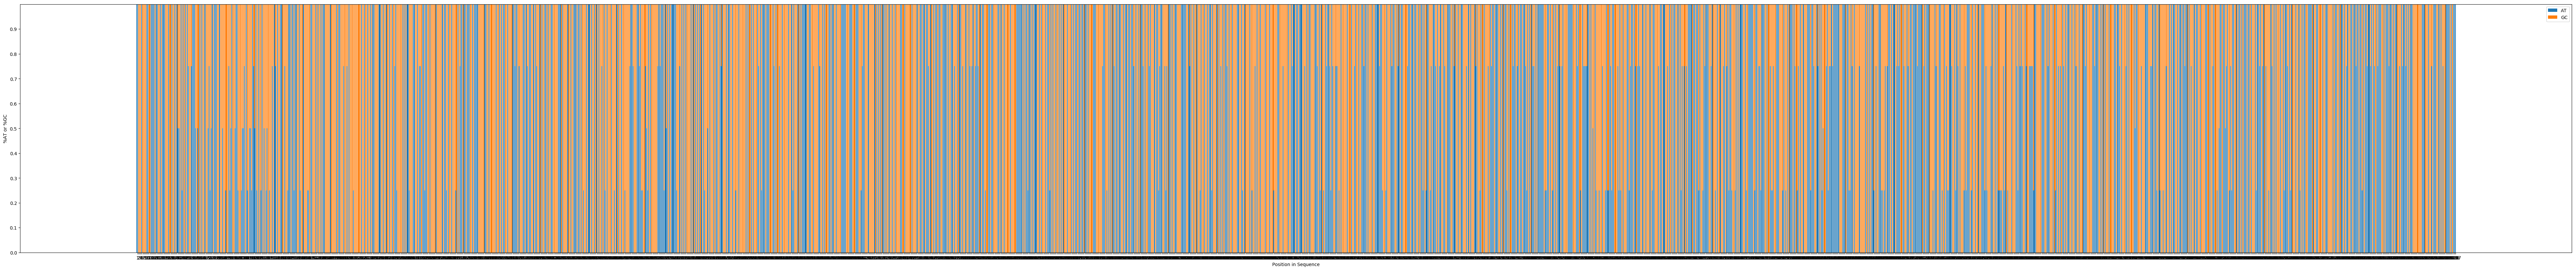

  7706  10030   168  0.434  0.566


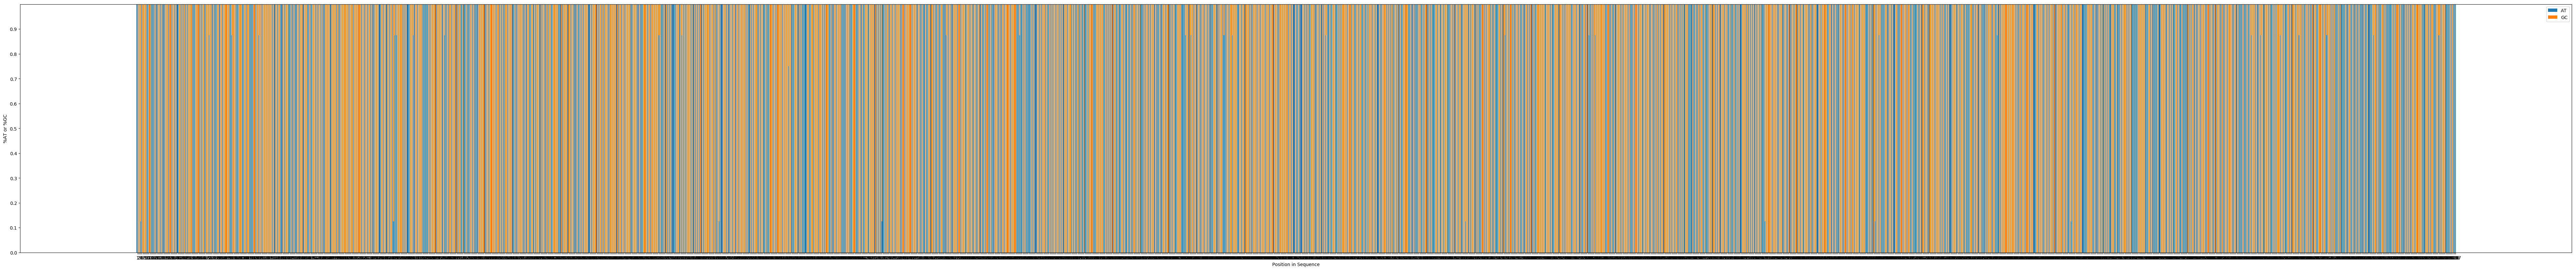

In [4]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

seq_list = [['rh.61', 'rh.58'],
           ['pi.2', 'pi.3', 'pi.1'],
           ['rh.10', 'bb.1', 'bb.2', 'hu.17', 'hu.6'],
           ['rh.2', 'rh.40', 'hu.67', 'hu.37', 'hu.40', 'hu.66', 'hu.41', 'rh.38', 'hu.42'],
           ['cy.3', 'cy.6', 'cy.4', 'cy.5', 'rh.13'],
           ['rh.35', 'rh.36', 'rh.37'],
           ['cy.2', 'rh.54', 'rh.55', 'rh.48', 'rh.62'],
           ['hu.43', 'hu.48', 'hu.44', 'hu.46'],
           ['hu.14', 'hu.31', 'hu.32', 'rh.43'],
           ['rh.64', 'rh.57', 'rh.51', 'rh.49', 'rh.53', 'rh.50', 'rh.52', 'hu.39']]

## length of every sequence = 2238
N = 2238

print('A/T'.rjust(6), 'G/C'.rjust(6), 'blnk'.rjust(5), end=' ')
print('AT.ro'.rjust(6),'GC.ro'.rjust(6))

for cluster in seq_list:
    
    figure(num=None, figsize=(100, 10), dpi=100)
    
    at = [ 0 for _ in range(N)] ## A/T
    gc = [ 0 for _ in range(N)] ## G/C
    bl = [ 0 for _ in range(N)] ## BLANK
    
    for seq_id in cluster:
        sequence = []
        for record in SeqIO.parse("seqs.aligned.fa", "fasta"):
            if(record.id==seq_id):
                sequence = record.seq
        
        #print(len(sequence))
        for n in range(len(sequence)):
            nt = sequence[n]
            if nt == 'A' or nt == 'T':
                at[n]+=1
            elif nt == 'G' or nt == 'C' :
                gc[n]+=1
            else :
                bl[n]+=1
    
    sum_at = sum(at)
    sum_gc = sum(gc)
    sum_bl = sum(bl)
    
    print(repr(sum_at).rjust(6),repr(sum_gc).rjust(6),repr(sum_bl).rjust(5),end=' ')
    print(repr(round(sum_at/(sum_at+sum_gc),3)).rjust(6),repr(round(sum_gc/(sum_at+sum_gc),3)).rjust(6) )

    
    boxplot_data = [ 0 for _ in range(N)]
    
    for i in range(N):
        if at[i]+gc[i] is not 0:
            boxplot_data[i] = (at[i]/(at[i]+gc[i]))
        else:
            boxplot_data[i] = 0
    
    reversebox_data = [ 1.0-boxplot_data[i] for i in range(N) ]
    
    ind = np.arange(N)
    p1 = plt.bar(ind, boxplot_data, 0.7 )
    p2 = plt.bar(ind, reversebox_data,0.7, bottom = boxplot_data )

    plt.xlabel('Position in Sequence')
    plt.ylabel('%AT or %GC')
    plt.xticks(np.arange(1,N,1))
    plt.yticks(np.arange(0,1.0,0.1))
    
    plt.legend((p1[0],p2[0]),('AT', 'GC'))
    
    plt.show()
    